In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [35]:
data = pd.read_csv('bank-additional-full.csv',sep=";")
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [36]:
# The classification goal is to predict whether 
# the client will subscribe (1/0) to a term deposit (variable y).
# Input Variables
  # 1. age (numeric)
  # 2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
  # 3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
  # 4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
  # 5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
  # 6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
  # 7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
  # 8. contact: contact communication type (categorical: “cellular”, “telephone”)
  # 9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
  # 10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
  # 11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
  # 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  # 13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  # 14. previous: number of contacts performed before this campaign and for this client (numeric)
  # 15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
  # 16. emp.var.rate: employment variation rate — (numeric)
  # 17. cons.price.idx: consumer price index — (numeric)
  # 18. cons.conf.idx: consumer confidence index — (numeric)
  # 19. euribor3m: euribor 3 month rate — (numeric)
  # 20. nr.employed: number of employees — (numeric)

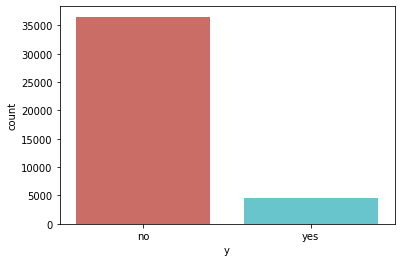

In [37]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [38]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

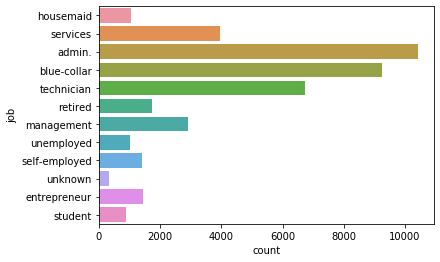

In [39]:
sns.countplot(y="job", data=data)
plt.show()

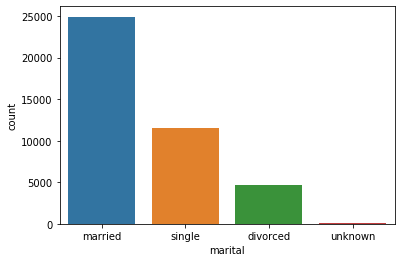

In [40]:
sns.countplot(x="marital", data=data)
plt.show()

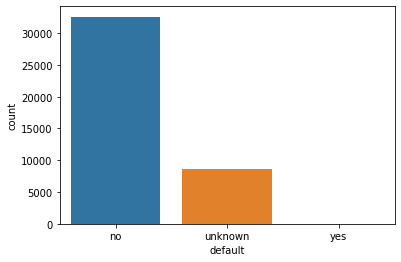

In [41]:
sns.countplot(x="default", data=data)
plt.show()

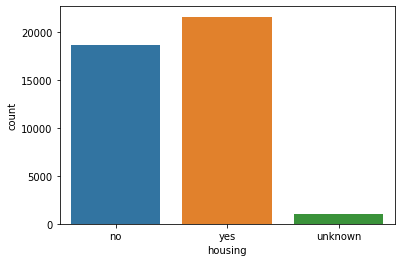

In [42]:
sns.countplot(x="housing", data=data)
plt.show()

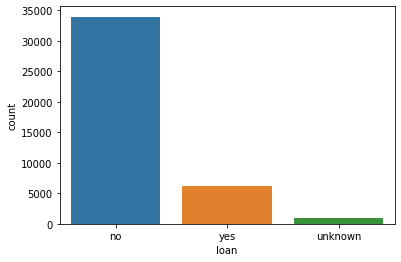

In [43]:
sns.countplot(x="loan", data=data)
plt.show()

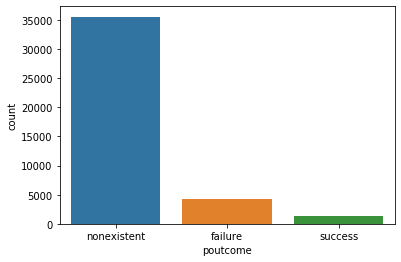

In [44]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [45]:
# Our prediction will be based on the customer’s job, marital status, 
# whether he(she) has credit in default, whether he(she) has a housing loan, 
# whether he(she) has a personal loan, 
# and the outcome of the previous marketing campaigns. 
# So, we will drop the variables that we do not need.

In [46]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [47]:
data.head()

,job,marital,default,housing,loan,poutcome,y
0,housemaid,married,no,no,no,nonexistent,no
1,services,married,unknown,no,no,nonexistent,no
2,services,married,no,yes,no,nonexistent,no
3,admin.,married,no,no,no,nonexistent,no
4,services,married,no,no,yes,nonexistent,no


In [48]:
# In logistic regression models, encoding all of the independent variables 
# as dummy variables allows easy interpretation and calculation of the odds ratios, 
# and increases the stability and significance of the coefficients.

In [49]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [50]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [51]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,no,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,no,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,no,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,no,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [52]:
data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [53]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [54]:
data2.loc[:, data2.columns.str.startswith('poutcome')][0:3]

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,1,0


In [55]:
# Drop the unknown columns
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [56]:
data2.loc[:, data2.columns.str.endswith('unknown')][0:3]

""
0
1
2


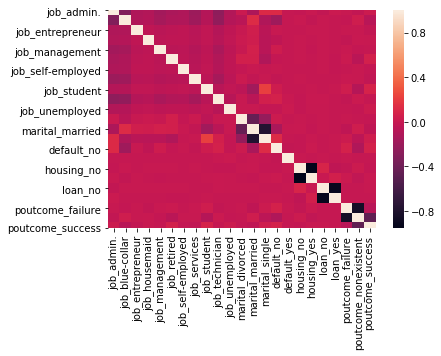

In [57]:
# Check the independence between the independent variables
sns.heatmap(data2.corr())
plt.show()

In [58]:
# Split the data- Train Set and test Set
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
# Check out training data is sufficient
X_train.shape

(30891, 23)

In [60]:
# Fit logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\bindu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Predicting the test set results and creating confusion matrix
# The confusion_matrix() function will calculate a confusion matrix 
# and return the result as an array.
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# TP  FP
# FN  TN

[[9016  123]
 [ 946  212]]


In [62]:
# The result is telling us that we have 9046+229 correct predictions 
# and 912+110 incorrect predictions.

In [63]:
# Print the accuracy:
print(classifier.score(X_test, y_test))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

0.8961833543750607
Accuracy of logistic regression classifier on test set: 0.90


In [64]:
#To quote from Scikit Learn:

#The precision is the ratio tp / (tp + fp) 
# where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier 
# to not label a sample as positive if it is negative.

#The recall is the ratio tp / (tp + fn) 
# where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
# where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights the recall more than the precision by a factor of beta. 
# beta = 1.0 means recall and precision are equally important.

#The support is the number of occurrences of each class in y_test.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9139
         yes       0.63      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.58      0.61     10297
weighted avg       0.87      0.90      0.87     10297



In [66]:
# Of the entire test set, 88% of the promoted term deposit 
# were the term deposit that the customers liked. Of the entire test set, 
# 90% of the customer’s preferred term deposits that were promoted.

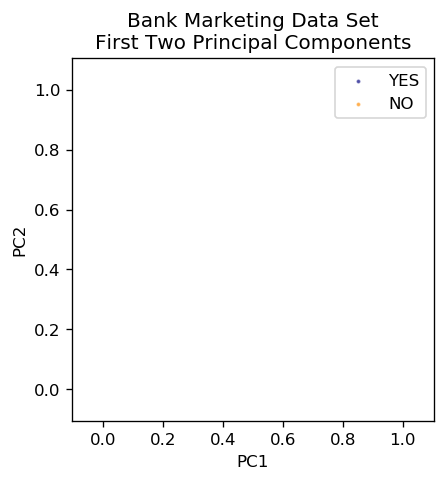

In [67]:
# Visualizing the Classification by converting inputs to 2D using PCA
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [68]:
print(y_pred.shape)

(10297,)


In [69]:
y_pred[1:100]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

In [70]:
y_pred_prob[1:15]

array([[0.92762973, 0.07237027],
       [0.96467931, 0.03532069],
       [0.90878493, 0.09121507],
       [0.92762973, 0.07237027],
       [0.93401949, 0.06598051],
       [0.95104471, 0.04895529],
       [0.91652564, 0.08347436],
       [0.89293822, 0.10706178],
       [0.84843518, 0.15156482],
       [0.32177022, 0.67822978],
       [0.87920239, 0.12079761],
       [0.89943617, 0.10056383],
       [0.89922738, 0.10077262],
       [0.91623954, 0.08376046]])